In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display

bestest = os.path.join("Y:\\", "Dissertation", "scores", "bestest.csv")
bestsubs = os.path.join("Y:\\", "Dissertation", "count_evals", "subs_top_3_per_algo.csv")
code2lang = os.path.join("Y:\\", "Dissertation", "geo", "code2lang.csv")
mapfile = os.path.join("Y:\\", "Dissertation", "geo", "World_Countries.shp")
langfile = os.path.join("Y:\\", "Dissertation", "geo", "countries-languages.csv")
# import relevant data

best_df = pd.read_csv(bestest)
code_df = pd.read_csv(code2lang)
langs=pd.read_csv(langfile)

In [29]:
best_df.columns = ['Index','code', 'Dimensions', 'Window', 'Algorithm', 'Score']
best_df.set_index('Index', inplace=True)
bxc = best_df.merge(code_df, on="code")
bxl = bxc.merge(langs, on="Language")


In [30]:
world_map = gpd.read_file(mapfile)

In [37]:
map_and_langs=world_map.merge(bxl, on="COUNTRY", how='left')
# Get rid of Antarctica
map_and_langs = map_and_langs.drop(map_and_langs[map_and_langs['COUNTRY'] == 'Antarctica'].index)

# Get rid of NaN values so countries don't get left out
map_and_langs['Dimensions'] = map_and_langs['Dimensions'].fillna(0)
map_and_langs['Window'] = map_and_langs['Window'].fillna(0)


In [38]:
map_and_langs['coords'] = map_and_langs['geometry'].apply(lambda x: x.representative_point().coords[:])
map_and_langs['coords'] = [coords[0] for coords in map_and_langs['coords']]

C:\Users\pgrim\AppData\Local\Temp\ipykernel_73004\3073090512.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info)


Text(0.5, 1.0, 'Best Dimensions by Country (Official Language)')

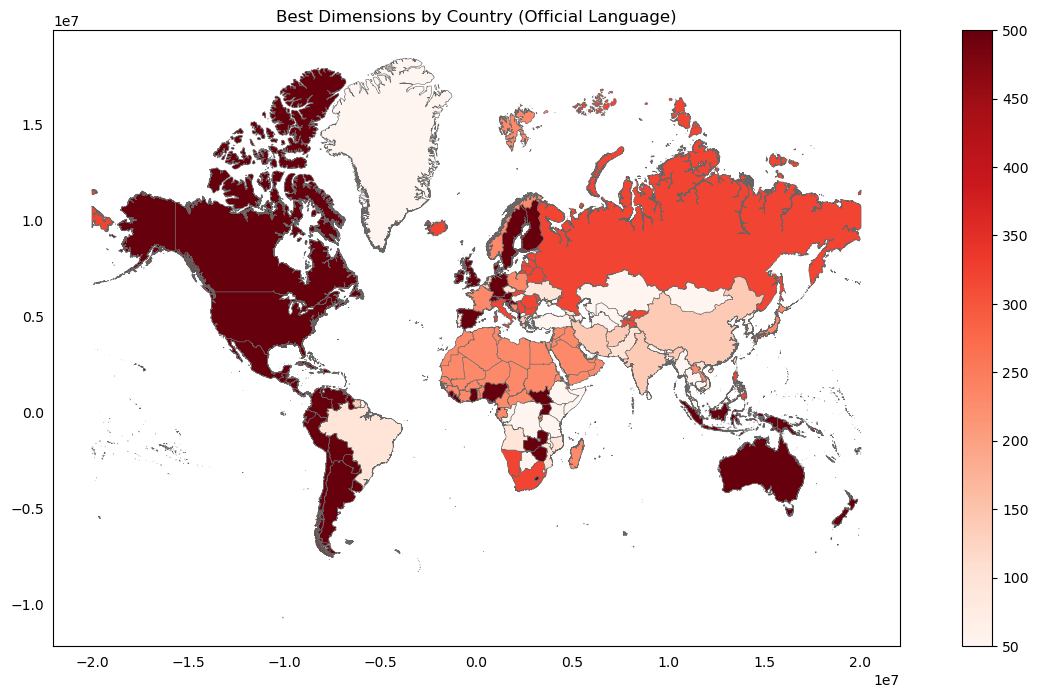

In [46]:
fig, ax = plt.subplots(1, figsize=(16, 8))
map_and_langs.plot(column="Dimensions", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=50, vmax=500))
bar_info._A = []
cbar = fig.colorbar(bar_info)

plt.tick_params(left = False) 
plt.tick_params(bottom = False) 
ax.set_title("Best Dimensions by Country (Official Language)")



C:\Users\pgrim\AppData\Local\Temp\ipykernel_73004\3696884526.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info)


Text(0.5, 1.0, 'Best Window Size by Country (Official Language)')

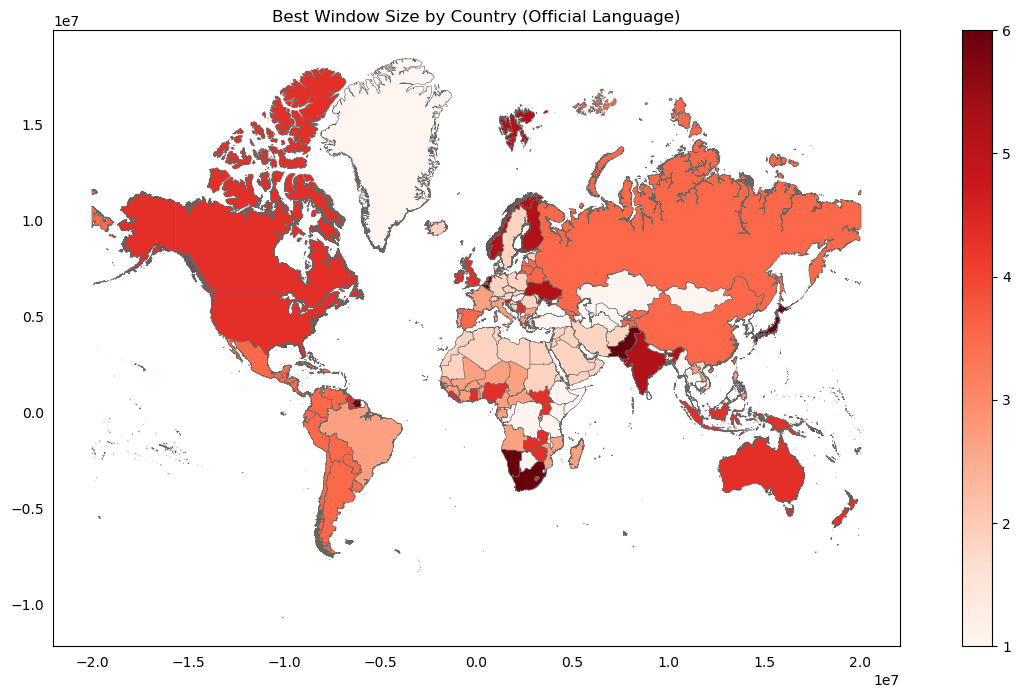

In [47]:
fig, ax = plt.subplots(1, figsize=(16, 8))
map_and_langs.plot(column="Window", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=1, vmax=6))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.tick_params(left = False) 
ax.tick_params(bottom = False) 
ax.set_title("Best Window Size by Country (Official Language)")


In [5]:
best_subs = pd.read_csv(bestsubs)
display(best_subs)

,Unnamed: 0,Language,Dimensions,Window,Algorithm,Score
0,46,af,300,6,cbow,0.091156
1,14,af,100,2,cbow,0.090525
2,28,af,200,3,cbow,0.090448
3,59,af,500,6,sg,0.068206
4,55,af,500,4,sg,0.062775
...,...,...,...,...,...,...
325,12,vi,100,1,cbow,0.011969
326,14,vi,100,2,cbow,0.008944
327,33,vi,200,5,sg,0.010831
328,15,vi,100,2,sg,0.010554


In [6]:
languages = set()

for index, stuff in best_subs.iterrows():
        languages.add(stuff['Language'])
        
retval = list()
pd.options.mode.copy_on_write = True
for lang in languages:
    df_lang = best_subs.loc[best_subs['Language'] == lang]
    df_lang.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)
    retval.append(df_lang.iloc[0])
    
retval_df = pd.DataFrame(retval)
retval_df.columns = ['Index','code', 'Dimensions', 'Window', 'Algorithm', 'Score']
retval_df.set_index('Index', inplace=True)


In [8]:

bsc = retval_df.merge(code_df, on="code")
bsl = bsc.merge(langs, on="Language")


In [9]:
world_map = gpd.read_file(mapfile)

In [10]:
map_and_langs=world_map.merge(bsl, on="COUNTRY", how='left')
# Get rid of Antarctica
map_and_langs = map_and_langs.drop(map_and_langs[map_and_langs['COUNTRY'] == 'Antarctica'].index)

# Get rid of NaN values so countries don't get left out
map_and_langs['Dimensions'] = map_and_langs['Dimensions'].fillna(0)
map_and_langs['Window'] = map_and_langs['Window'].fillna(0)

In [11]:
map_and_langs['coords'] = map_and_langs['geometry'].apply(lambda x: x.representative_point().coords[:])
map_and_langs['coords'] = [coords[0] for coords in map_and_langs['coords']]

C:\Users\pgrim\AppData\Local\Temp\ipykernel_116364\4231765934.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info)


Text(0.5, 1.0, 'OpenSubtitles Best Dimensions by Country (Official Language)')

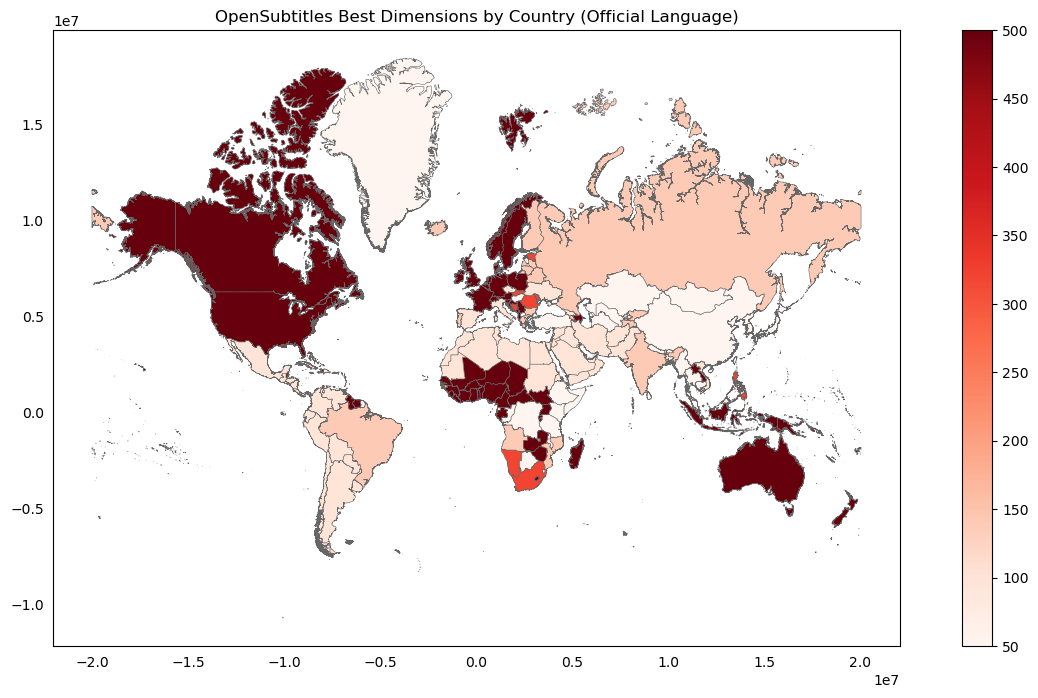

In [12]:
fig, ax = plt.subplots(1, figsize=(16, 8))
map_and_langs.plot(column="Dimensions", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=50, vmax=500))
bar_info._A = []
cbar = fig.colorbar(bar_info)

plt.tick_params(left = False) 
plt.tick_params(bottom = False) 
ax.set_title("OpenSubtitles Best Dimensions by Country (Official Language)")
